## 1.	Data wrangling

a.	Ensure that the data is clean and free from any missing or incorrect entries.

○	Inspect the data manually to identify missing or incorrect information using the functions isna() and notna().

b.	Based on your knowledge of data analytics, include your recommendations for treating missing and incorrect data (dropping the null values or filling them).

c.	Choose a suitable data wrangling technique—either data standardization or normalization. Execute the preferred normalization method and present the resulting data. (Normalization is the preferred approach for this problem.)

d.	Share your insights regarding the application of the GroupBy() function for either data chunking or merging, and offer a recommendation based on your analysis.


In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("AusApparalSales4thQrt2020.csv")

# Step 1a: Check for missing or incorrect data
print("Missing values in each column:")
print(df.isna().sum())
print("\nNon-missing values in each column:")
print(df.notna().sum())
print("\nData types:")
print(df.dtypes)

# Step 1b: Recommendation for missing data treatment
recommendations = {}
for col in df.columns:
    if df[col].isna().sum() > 0:
        if df[col].dtype == 'object':
            recommendations[col] = 'Fill with mode'
        else:
            recommendations[col] = 'Fill with median'
    else:
        recommendations[col] = 'No action needed'

print("\nTreatment recommendations for each column:")
for k, v in recommendations.items():
    print(f"{k}: {v}")

# Step 1c: Normalize 'Unit' and 'Sales' columns
scaler = MinMaxScaler()
df['Unit_Normalized'] = scaler.fit_transform(df[['Unit']])
df['Sales_Normalized'] = scaler.fit_transform(df[['Sales']])

print("\nSample of normalized data:")
print(df[['Unit', 'Unit_Normalized', 'Sales', 'Sales_Normalized']].head())

# Step 1d: Apply groupby to summarize sales by state

state_summary = df.groupby('State').agg(
    Total_Units=('Unit', 'sum'),
    Total_Sales=('Sales', 'sum'),
    Average_Sales=('Sales', 'mean'),
    Transactions=('Sales', 'count')
).sort_values(by='Total_Sales', ascending=False)

print("\nGrouped sales summary by state:")
print(state_summary)


Missing values in each column:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

Non-missing values in each column:
Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

Data types:
Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

Treatment recommendations for each column:
Date: No action needed
Time: No action needed
State: No action needed
Group: No action needed
Unit: No action needed
Sales: No action needed

Sample of normalized data:
   Unit  Unit_Normalized  Sales  Sales_Normalized
0     8         0.095238  20000          0.095238
1     8         0.095238  20000          0.095238
2     4         0.031746  10000          0.031746
3    15         0.206349  37500          0.206349
4     3         0.015873   7500          0.015873

Grouped sales summary by state:
       Total_Units  Total_Sales  Average_Sales  Transactions
State                      

In [14]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


## 2.	Data analysis

a.	Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis.

b.	Identify the group with the highest sales and the group with the lowest sales based on the data provided.

c.	Identify the group with the highest and lowest sales based on the data provided.

d.	Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.

(Use suitable libraries such as NumPy, Pandas, and SciPy for performing the analysis.)


In [4]:
import pandas as pd
import numpy as np
from scipy import stats

#############################################################################################################
# Step 2a: Descriptive statistics for Sales and Unit
print("===== Descriptive Statistics =====")
for col in ['Sales', 'Unit']:
    print(f"\nColumn: {col}")
    print(f"Mean: {df[col].mean():,.2f}")
    print(f"Median: {df[col].median():,.2f}")
    print(f"Mode: {df[col].mode()[0]:,.2f}")
    print(f"Standard Deviation: {df[col].std():,.2f}")

###############################################################################################################
# Step 2b & 2c: Identify group with highest and lowest total sales

group_sales = df.groupby('Group')['Sales'].sum().sort_values(ascending=False)
highest_sales_group = group_sales.idxmax()
lowest_sales_group = group_sales.idxmin()

print("\n===== Group Sales Summary =====")
print(group_sales)

print(f"\nGroup with Highest Sales: {highest_sales_group.strip()}")
print(f"Group with Lowest Sales: {lowest_sales_group.strip()}")

################################################################################################################

# Step 2d: Generate weekly, monthly, and quarterly reports
# Convert Date column to datetime

df['Date'] = pd.to_datetime(df['Date'])

# Weekly report (Monday as start of the week)
weekly_report = df.resample('W-Mon', on='Date').agg({'Sales': 'sum', 'Unit': 'sum'})
weekly_report.index.name = 'Week Starting'

# Monthly report
monthly_report = df.resample('M', on='Date').agg({'Sales': 'sum', 'Unit': 'sum'})
monthly_report.index.name = 'Month'

# Quarterly report
quarterly_report = df.resample('Q', on='Date').agg({'Sales': 'sum', 'Unit': 'sum'})
quarterly_report.index.name = 'Quarter End'

print("\n===== Weekly Report Sample =====")
print(weekly_report.head())

print("\n===== Monthly Report Sample =====")
print(monthly_report)

print("\n===== Quarterly Report Sample =====")
print(quarterly_report)


===== Descriptive Statistics =====

Column: Sales
Mean: 45,013.56
Median: 35,000.00
Mode: 22,500.00
Standard Deviation: 32,253.51

Column: Unit
Mean: 18.01
Median: 14.00
Mode: 9.00
Standard Deviation: 12.90

===== Group Sales Summary =====
Group
 Men        85750000
 Women      85442500
 Kids       85072500
 Seniors    84037500
Name: Sales, dtype: int64

Group with Highest Sales: Men
Group with Lowest Sales: Seniors

===== Weekly Report Sample =====
                  Sales   Unit
Week Starting                 
2020-10-05     18907500   7563
2020-10-12     26935000  10774
2020-10-19     26805000  10722
2020-10-26     26590000  10636
2020-11-02     20797500   8319

===== Monthly Report Sample =====
                Sales   Unit
Month                       
2020-10-31  114290000  45716
2020-11-30   90682500  36273
2020-12-31  135330000  54132

===== Quarterly Report Sample =====
                 Sales    Unit
Quarter End                   
2020-12-31   340302500  136121


## 3.	Data visualization
a.	Use suitable data visualization libraries to construct a dashboard for the head of sales and marketing. The dashboard should encompass key parameters:

o	State-wise sales analysis for different demographic groups (kids, women, men, and seniors).

o	Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.

o	Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. This information aids in designing programs like hyper-personalization and Next Best Offers to enhance sales.


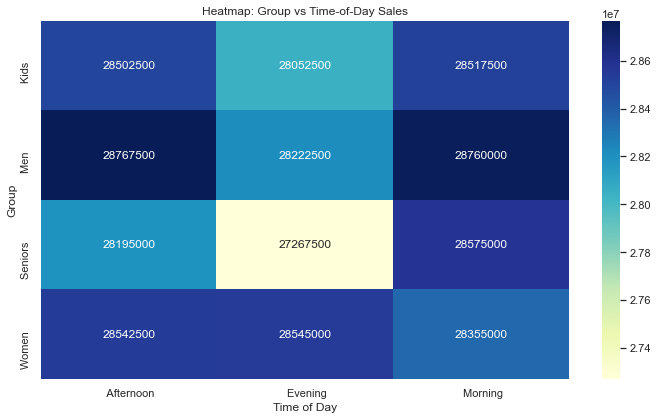

In [12]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

# --------------------------------------
# A.1 - State-wise sales by demographic group
# --------------------------------------
state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()

fig1 = px.bar(
    state_group_sales,
    x="State",
    y="Sales",
    color="Group",
    barmode="group",
    title="State-wise Sales Analysis by Demographic Group"
)
fig1.show()

# --------------------------------------
# A.2 - Group-wise sales across states (Alternative view)
# --------------------------------------
group_state_sales = df.groupby(['Group', 'State'])['Sales'].sum().reset_index()

fig2 = px.bar(
    group_state_sales,
    x="Group",
    y="Sales",
    color="State",
    barmode="group",
    title="Group-wise Sales Across States"
)
fig2.show()

# --------------------------------------
# A.3 - Time-of-day Sales Analysis
# --------------------------------------
time_sales = df.groupby('Time')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

fig3 = px.bar(
    time_sales,
    x="Time",
    y="Sales",
    color="Time",
    title="Sales by Time of Day (Peak vs Off-Peak)"
)
fig3.show()

# Optional: Create a heatmap for deeper interaction insights
pivot_heatmap = df.pivot_table(values='Sales', index='Group', columns='Time', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_heatmap, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap: Group vs Time-of-Day Sales")
plt.xlabel("Time of Day")
plt.ylabel("Group")
plt.tight_layout()
plt.show()


b.	Ensure the visualization is clear and accessible for effective decision-making by the head of sales and marketing (S&M).
The dashboard must contain daily, weekly, monthly, and quarterly charts.
(Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.)
c.	Include your recommendation and indicate why you are choosing the recommended visualization package.


/Users/Sahar/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 128197 missing from current font.

/Users/Sahar/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 128197 missing from current font.



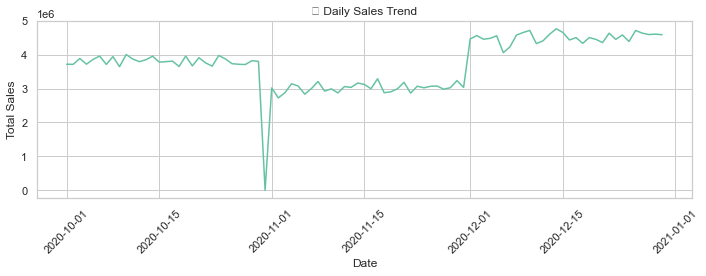

/Users/Sahar/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 128202 missing from current font.

/Users/Sahar/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 128202 missing from current font.



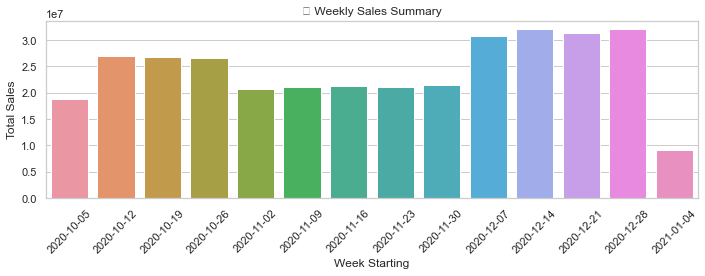

/Users/Sahar/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 128198 missing from current font.

/Users/Sahar/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 128198 missing from current font.



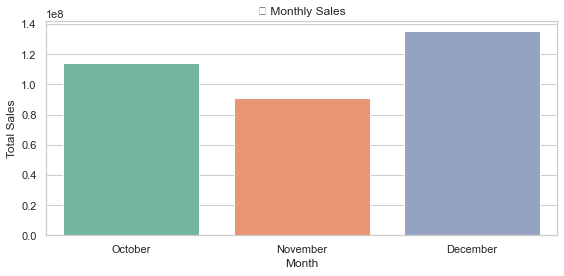

/Users/Sahar/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 128200 missing from current font.

/Users/Sahar/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 128200 missing from current font.



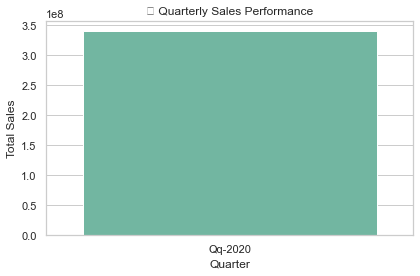

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv("AusApparalSales4thQrt2020.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Set global style
sns.set(style="whitegrid", palette="Set2")

# Resample for time-based aggregation
daily_sales = df.resample('D', on='Date').sum()
weekly_sales = df.resample('W-Mon', on='Date').sum()
monthly_sales = df.resample('M', on='Date').sum()
quarterly_sales = df.resample('Q', on='Date').sum()

# ----------------------------
# Daily Sales Chart
# ----------------------------
plt.figure(figsize=(10, 4))
sns.lineplot(data=daily_sales, x=daily_sales.index, y='Sales')
plt.title("📅 Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------------------------
# Weekly Sales Chart
# ----------------------------
plt.figure(figsize=(10, 4))
sns.barplot(x=weekly_sales.index.strftime('%Y-%m-%d'), y=weekly_sales['Sales'])
plt.title("📊 Weekly Sales Summary")
plt.xlabel("Week Starting")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------------------------
# Monthly Sales Chart
# ----------------------------
plt.figure(figsize=(8, 4))
sns.barplot(x=monthly_sales.index.strftime('%B'), y=monthly_sales['Sales'])
plt.title("📆 Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

# ----------------------------
# Quarterly Sales Chart
# ----------------------------
plt.figure(figsize=(6, 4))
sns.barplot(x=quarterly_sales.index.strftime('Q%q-%Y'), y=quarterly_sales['Sales'])
plt.title("📈 Quarterly Sales Performance")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


# AAL Q4 Sales Analysis Report
**Prepared in JupyterLab**  
This report covers data wrangling, statistical analysis, and visualizations to support sales & marketing decisions for AAL in Australia.

---

## 1. Data Wrangling
- Clean data
- Normalize numeric values
- Handle missing data


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("AusApparalSales4thQrt2020.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Check missing values
df.isna().sum()


Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

### Missing Data Treatment
No missing values found. No imputation needed.

### Normalization
Normalization is applied using MinMaxScaler to `Unit` and `Sales` columns.


In [15]:
# Normalize the Unit and Sales columns
scaler = MinMaxScaler()

# Fit and transform 'Unit' and 'Sales'
normalized_values = scaler.fit_transform(df[['Unit', 'Sales']])

# Assign back to new columns
df['Unit_Normalized'] = normalized_values[:, 0]
df['Sales_Normalized'] = normalized_values[:, 1]

# Check
df[['Unit', 'Sales', 'Unit_Normalized', 'Sales_Normalized']].head()


,Unit,Sales,Unit_Normalized,Sales_Normalized
0,8,20000,0.095238,0.095238
1,8,20000,0.095238,0.095238
2,4,10000,0.031746,0.031746
3,15,37500,0.206349,0.206349
4,3,7500,0.015873,0.015873


## 2. Descriptive Statistical Analysis


In [16]:
print("Sales - Mean:", df['Sales'].mean())
print("Sales - Median:", df['Sales'].median())
print("Sales - Std Dev:", df['Sales'].std())


Sales - Mean: 45013.5582010582
Sales - Median: 35000.0
Sales - Std Dev: 32253.506943966317


### Box Plot for Descriptive Stats
This visual shows the spread and central tendency of `Sales` and `Unit` values.


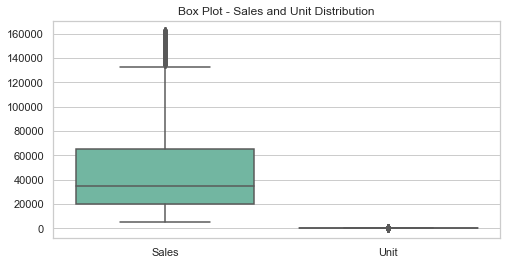

In [17]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['Sales', 'Unit']])
plt.title("Box Plot - Sales and Unit Distribution")
plt.show()


## 3. Statistical Distribution of Sales
Using Seaborn's distribution plot to observe skewness or modality in sales.


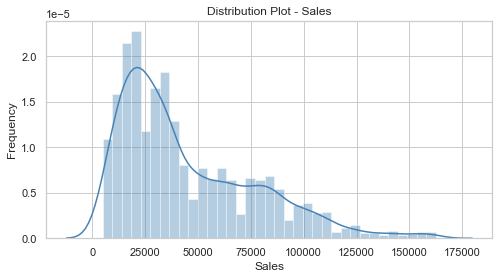

In [19]:
plt.figure(figsize=(8, 4))
sns.distplot(df['Sales'], kde=True, color='steelblue')
plt.title("Distribution Plot - Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()



## 4. Recommendations

- Focus marketing efforts on top-performing states (VIC, NSW).
- Use time-of-day analysis to boost targeted promotions during peak hours.
- Monitor customer groups like 'Seniors' for tailored offers due to lower sales.
- Recommend using weekly and monthly dashboards to spot trends early.
